# **League of legens Statistics**


---
<img src = "https://drive.google.com/uc?export=view&id=15aNyBdeI13XHeAxom4PaNDW4zt107kYv" height = "600">

---
**Julian Prada**<br>
**2212925**<br>
**Inteligencia artificial 1**<br>
**F1**<br>

---
Esto es la primera fase del proyecto 1 de inteligencia artificial 1, que tiene como objetivo la clasificación de los distintos campeones del juego llamado League of Legends, basado en sus estadísticas base, como velocidad de movimiento a nivel 1, velocidad de ataque, resistencias y daños. Estas últimas, así como todas las demás estadísticas a nivel 1 y las que se incrementan con cada nivel, se utilizarán para clasificar a los campeones según su tipo: más daño, más aguante, más vida, etc.

Comenzaré importando librerías, luego mostraré los datos que trae este DataFrame, para posteriormente depurarlo, quitando las columnas que no sean pertinentes para el desarrollo del proyecto. Por último, se graficará cada columna adecuadamente según el tipo de información que posea.

In [41]:
#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
#leer el csv
Lol_Statistics = pd.read_csv('https://drive.google.com/uc?id=1SVGZgEJKtMJLIsSZ5PNG06rZSX8WGHq5')

Lol_Statistics


,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.00,0.00,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.00,0.80,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.00,0.00,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.20,0.70,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.50,0.80,62,3.75,2.125,0.625,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Zeri,Marksman,Bottom,Ranged,Mana,600,110,250,45.0,330,...,500,3.25,0.70,6.00,0.80,56,2.00,2.000,0.658,0.625
163,Ziggs,Mage,"Bottom,Middle",Ranged,Mana,606,106,480,23.5,325,...,550,6.50,0.60,8.00,0.80,55,3.10,2.000,0.656,0.656
164,Zilean,"Support,Mage",Support,Ranged,Mana,574,96,452,50.0,335,...,550,5.50,0.50,11.35,0.80,52,3.00,2.130,0.658,0.625
165,Zoe,Mage,Middle,Ranged,Mana,630,106,425,25.0,340,...,550,7.50,0.60,8.00,0.65,58,3.30,2.500,0.658,0.625


In [3]:
Lol_1ras_5_columnas = Lol_Statistics.iloc[:, :5]


Lol_Statistics = Lol_Statistics.drop(Lol_Statistics.columns[:5], axis=1)

print("Se guardaron las 1ras 5 columnas del dataset para un posterior uso (por si acaso) y los borramos del dataframe con el que vamos a trabajar")

Lol_campeones_para_probar = Lol_Statistics.iloc[-5:,:]

Lol_Statistics = Lol_Statistics.drop(Lol_Statistics.index[-5:])
Lol_1ras_5_columnas = Lol_1ras_5_columnas.drop(Lol_1ras_5_columnas.index[-5:])

print("Se guardaron 5 ejemplos para probar una vez el modelo esté listo")
print("\n")


Lol_Statistics.dropna(axis=0, how='any')
print("Y se depuró de valores nulos")

Lol_Statistics

Se guardaron las 1ras 5 columnas del dataset para un posterior uso (por si acaso) y los borramos del dataframe con el que vamos a trabajar
Se guardaron 5 ejemplos para probar una vez el modelo esté listo


Y se depuró de valores nulos


,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,Base armor,Armor per lvl,Base magic resistance,Magic resistance per lvl,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,650,114,0,0.0,345,38,4.8,32,2.05,175,3.00,0.50,0.0,0.00,60,5.00,2.500,0.651,0.651
1,590,104,418,25.0,330,21,4.7,30,1.30,550,2.50,0.60,8.0,0.80,53,3.00,2.200,0.668,0.625
2,600,119,200,0.0,345,23,4.7,37,2.05,125,9.00,0.90,50.0,0.00,62,3.30,3.200,0.625,0.625
3,630,107,350,40.0,330,26,4.7,30,1.30,500,3.75,0.65,8.2,0.70,52,3.00,4.000,0.638,0.400
4,685,120,350,40.0,330,47,4.7,32,2.05,125,8.50,0.85,8.5,0.80,62,3.75,2.125,0.625,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,620,105,500,0.0,345,33,4.6,32,2.05,175,7.50,0.75,0.0,0.00,60,2.00,3.500,0.625,0.625
158,650,114,300,60.0,340,39,5.2,32,2.05,175,8.00,0.80,7.5,0.75,62,5.00,2.000,0.625,0.625
159,500,69,440,45.0,330,25,4.2,25,1.10,425,5.00,0.55,10.0,0.40,49,3.10,1.000,0.625,0.625
160,685,109,0,0.0,340,33,4.7,32,2.05,175,5.00,0.50,0.0,0.00,60,3.40,1.600,0.736,0.638


In [4]:
print("Posterior sigue una descripción resumen del dataset")
Lol_Statistics.describe()

Posterior sigue una descripción resumen del dataset


,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,Base armor,Armor per lvl,Base magic resistance,Magic resistance per lvl,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,618.506173,104.117284,310.765432,36.805556,336.222222,30.074074,4.647840,30.783951,1.696605,321.327160,6.317901,0.660494,8.126235,0.56821,58.981481,3.202417,2.548673,0.651969,0.636698
std,39.724243,8.739420,122.046043,19.977336,7.085108,6.386667,0.518669,1.722050,0.378749,192.371433,1.914521,0.152661,8.081115,0.29895,5.694579,0.659427,0.901138,0.035909,0.067545
min,410.000000,69.000000,0.000000,0.000000,325.000000,18.000000,0.000000,22.000000,1.100000,125.000000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000,0.475000,0.000000
25%,596.500000,99.000000,280.000000,28.000000,330.000000,26.000000,4.450000,30.000000,1.300000,125.000000,5.500000,0.550000,6.500000,0.40000,55.000000,3.000000,2.000000,0.625000,0.625000
50%,627.500000,104.000000,330.000000,40.000000,335.000000,30.000000,4.700000,30.000000,2.050000,175.000000,6.500000,0.600000,7.500000,0.70000,59.500000,3.100000,2.500000,0.646000,0.638000
75%,645.000000,109.000000,375.000000,50.000000,340.000000,34.750000,4.950000,32.000000,2.050000,525.000000,8.000000,0.750000,8.000000,0.80000,63.000000,3.500000,3.200000,0.667000,0.658000
max,696.000000,129.000000,530.000000,87.000000,355.000000,47.000000,5.500000,39.000000,2.550000,650.000000,10.000000,1.250000,50.000000,1.00000,69.000000,5.000000,6.000000,0.850000,0.850000


Matriz de correlación entre las columnas


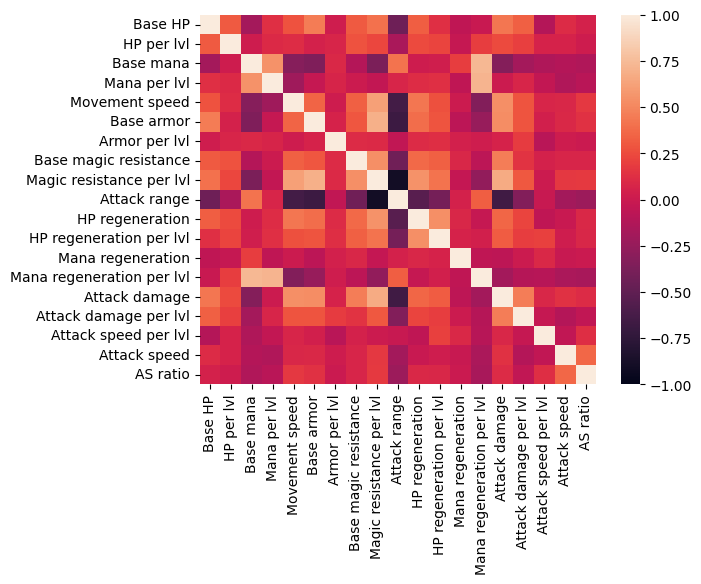

In [31]:
sns.heatmap(Lol_Statistics.corr(), vmin=-1, vmax=1)
print("Matriz de correlación entre las columnas")

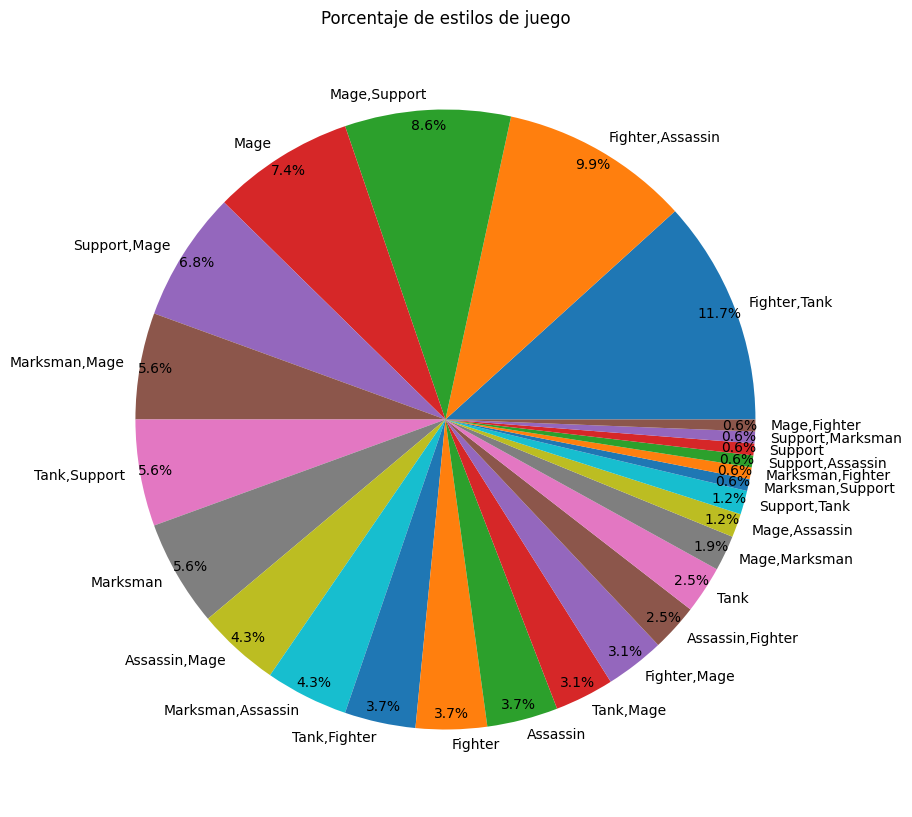

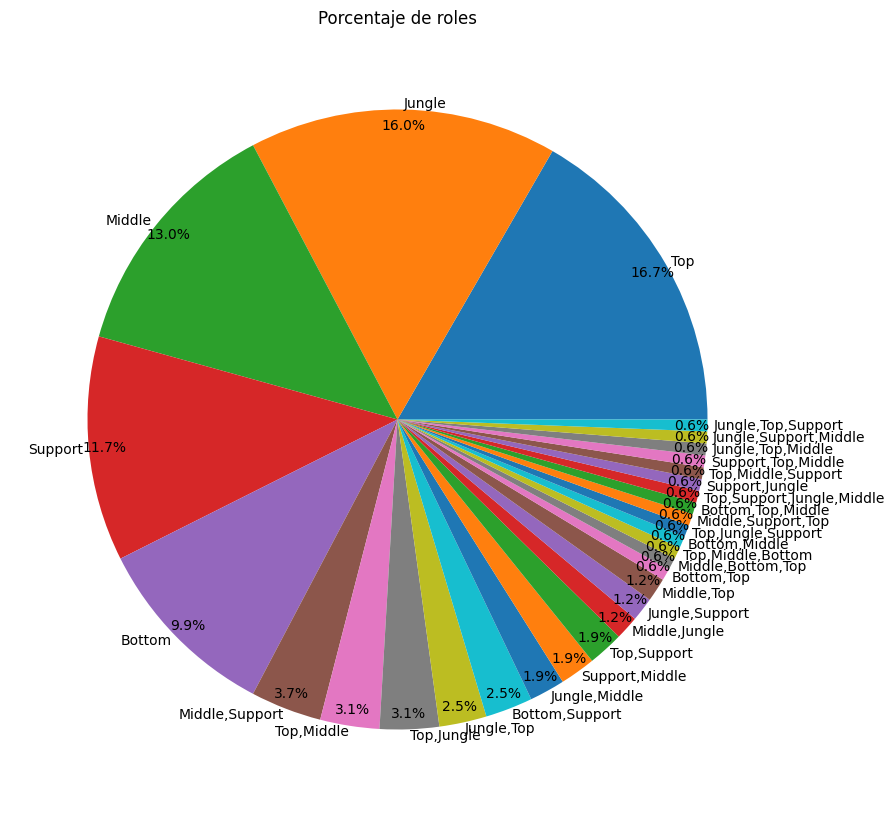

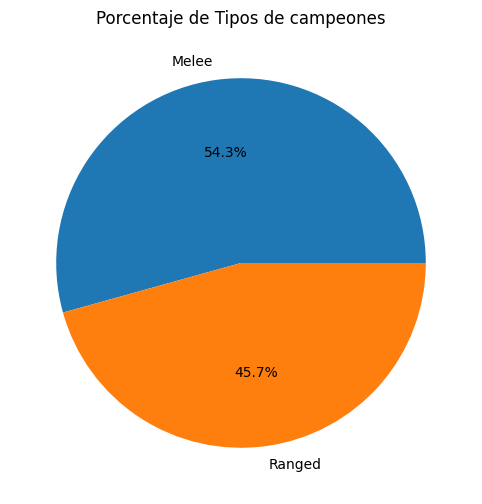

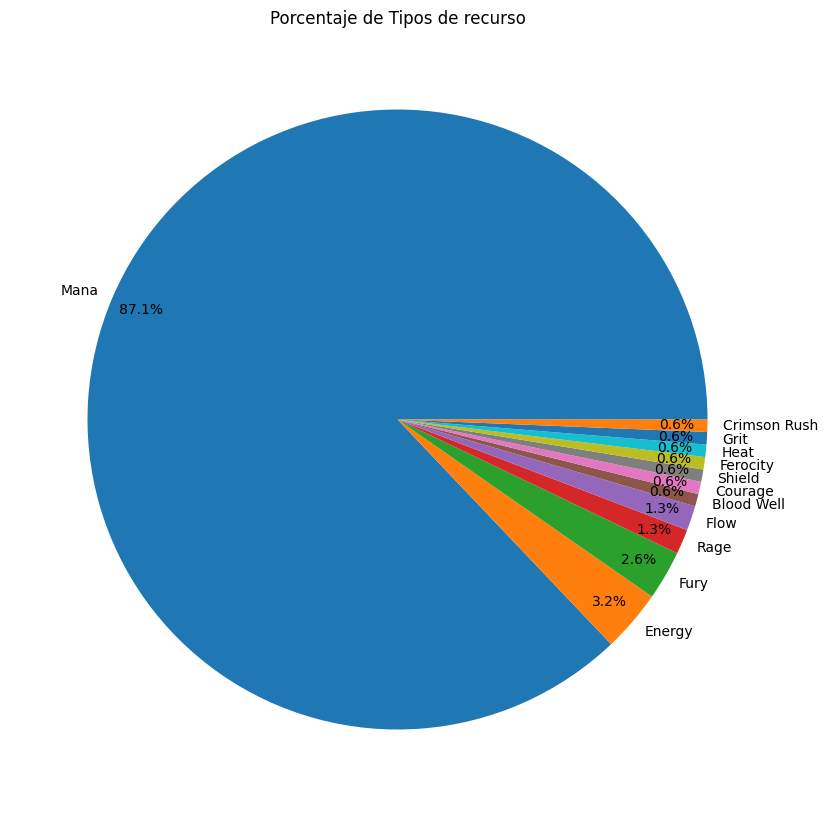

In [5]:
counts = Lol_1ras_5_columnas['Tags'].value_counts()

plt.figure(figsize=(10, 15))
plt.pie(counts, labels = counts.index, labeldistance=1.05, autopct='%1.1f%%', pctdistance=0.949)


plt.title('Porcentaje de estilos de juego')
plt.show()

#################################################################################################
print(" ")
counts = Lol_1ras_5_columnas['Role'].value_counts()

plt.figure(figsize=(10, 15))
plt.pie(counts, labels = counts.index, labeldistance=1.02, autopct='%1.1f%%', pctdistance=0.949)


plt.title('Porcentaje de roles')
plt.show()

#######################################################################################################
print(" ")
counts = Lol_1ras_5_columnas['Range type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')


plt.title('Porcentaje de Tipos de campeones')
plt.show()

####################################################################
print(" ")
counts = Lol_1ras_5_columnas['Resourse type'].value_counts()
plt.figure(figsize=(10, 15))
plt.pie(counts, labels = counts.index, labeldistance=1.05, autopct='%1.1f%%', pctdistance=0.9)


plt.title('Porcentaje de Tipos de recurso')
plt.show()

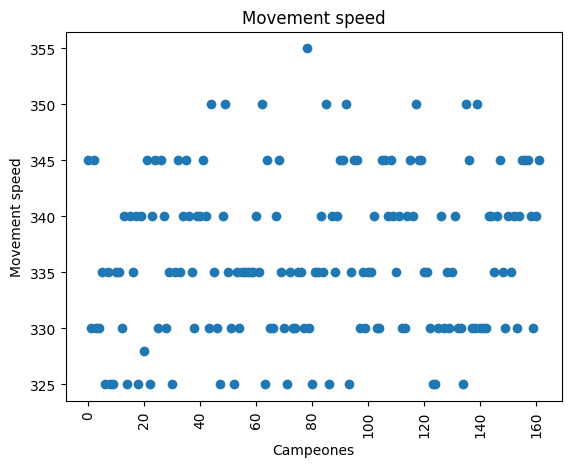

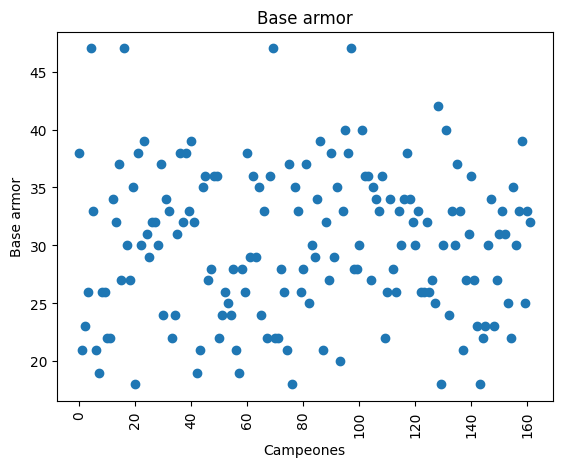

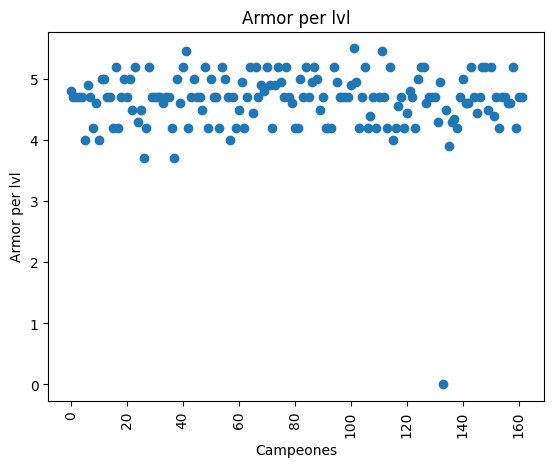

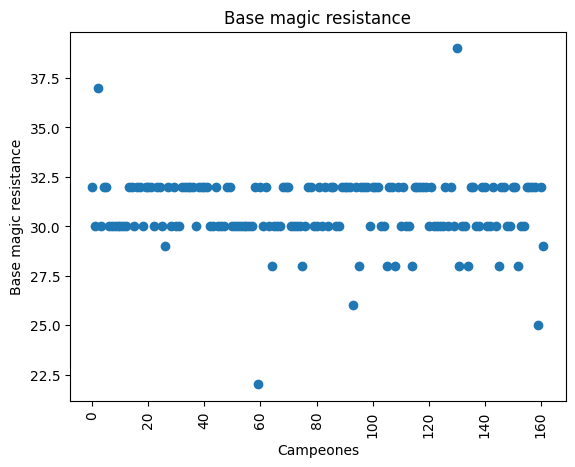

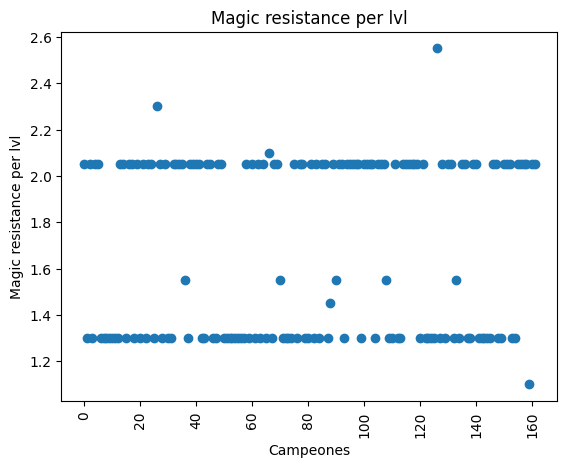

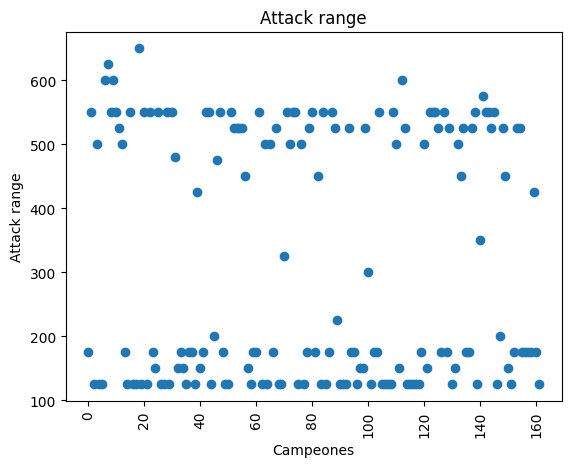

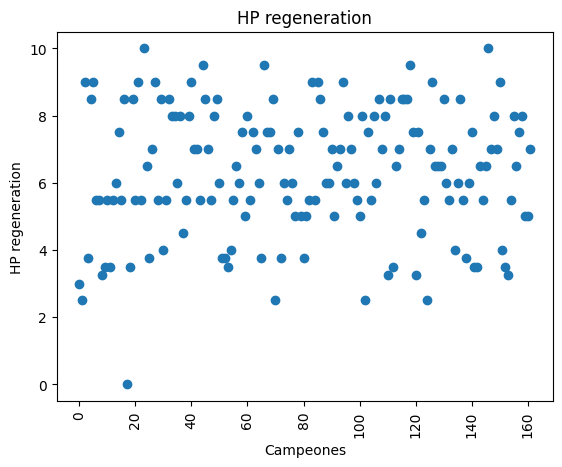

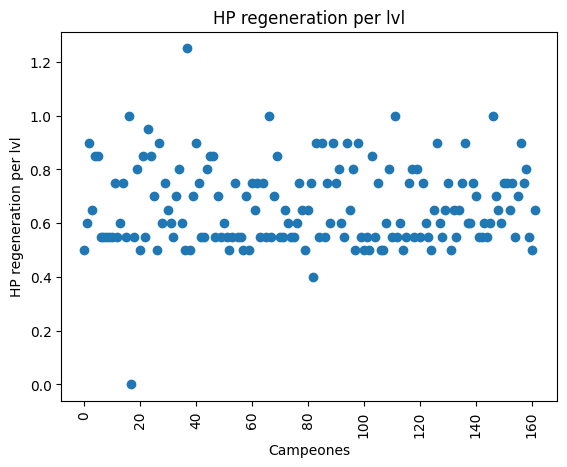

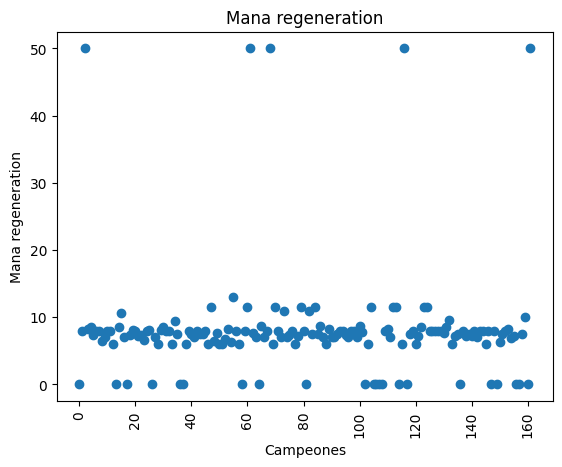

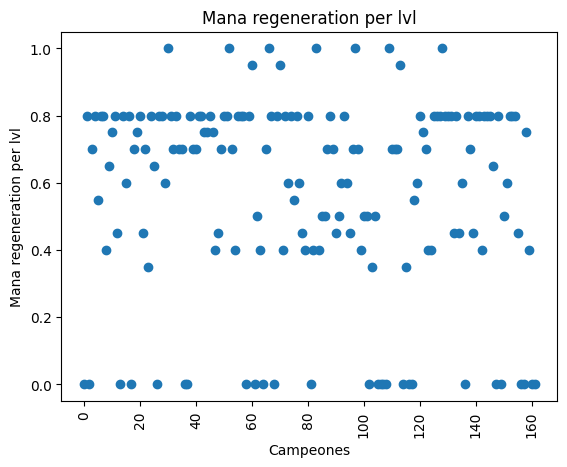

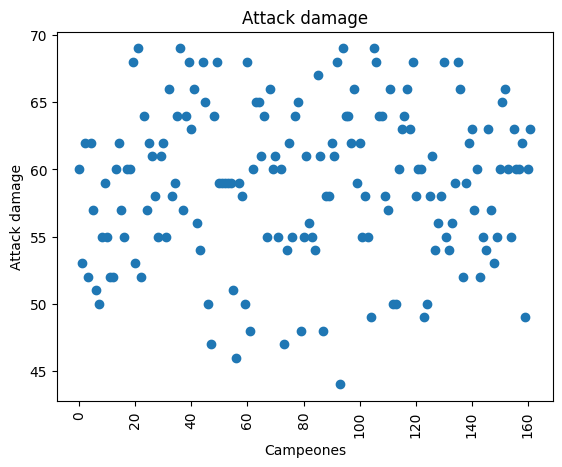

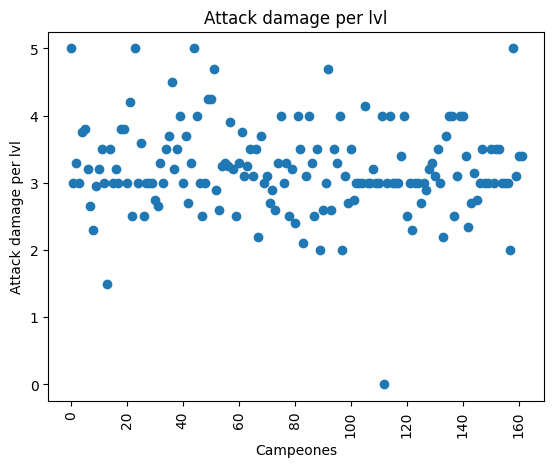

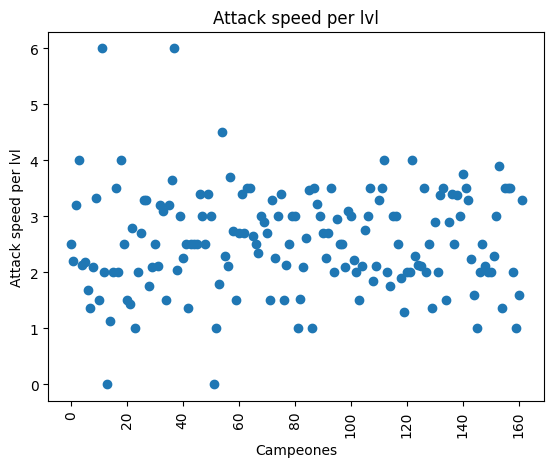

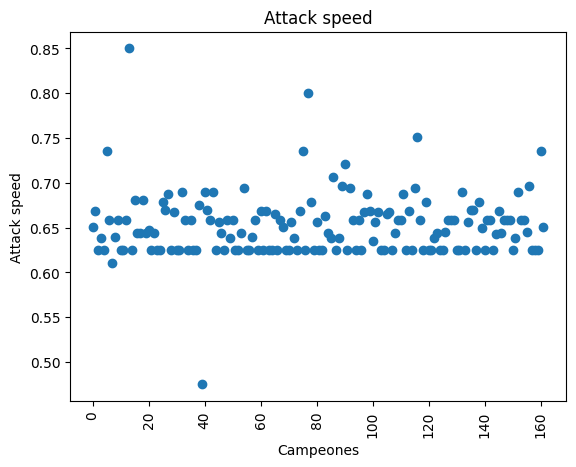

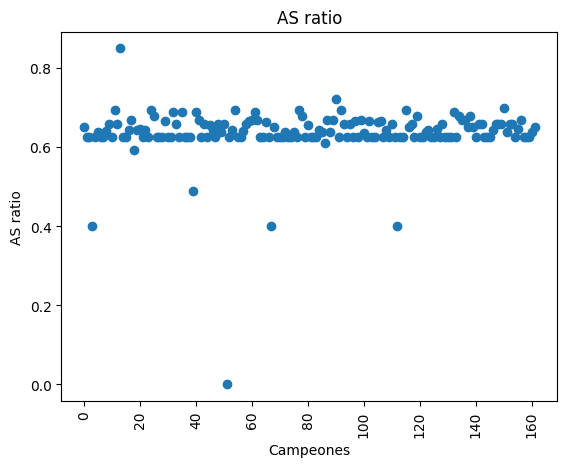

In [32]:
def hacer_Grafico (columna, nombre_columna):
  plt.plot(figsize=(8, 6))
  counts = columna.index
  plt.scatter(counts, columna)
  plt.title(nombre_columna)
  plt.xlabel('Campeones')
  plt.ylabel(nombre_columna)
  plt.xticks(rotation=90)
  plt.show()

for column in Lol_Statistics.columns[4:]:
    hacer_Grafico(Lol_Statistics[column], column)
    print(" ")

In [34]:
print("Una vez explorado procederemos a normalizar el dataset y a definir la columna de clasificación que podría ser la columna de 'Tags', mas sin embargo hay otras que son posibles candidatos tambien")

Lol_Statistics = ( ( Lol_Statistics - Lol_Statistics.mean() ) / ( Lol_Statistics.std() ) )

Lol_Statistics


Una vez explorado procederemos a normalizar el dataset y a definir la columna de clasificación que podría ser la columna de 'Tags', mas sin embargo hay otras que son posibles candidatos tambien


,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,Base armor,Armor per lvl,Base magic resistance,Magic resistance per lvl,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,0.792811,1.130821,-2.546297,-1.842366,1.238905,1.241011,0.293368,0.706164,0.933058,-0.760649,-1.733019,-1.051309,-1.005583,-1.900683,0.178858,2.725975,-0.054013,-0.026988,0.211748
1,-0.717601,-0.013420,0.878640,-0.590947,-0.878211,-1.420784,0.100566,-0.455243,-1.047143,1.188705,-1.994181,-0.396263,-0.015621,0.775347,-1.050382,-0.306959,-0.386925,0.446426,-0.173182
2,-0.465866,1.702941,-0.907571,-1.842366,1.238905,-1.107632,0.100566,3.609681,0.933058,-1.020563,1.400924,1.568877,5.181682,-1.900683,0.530069,0.147981,0.722783,-0.751033,-0.173182
3,0.289340,0.329852,0.321473,0.159903,-0.878211,-0.637903,0.100566,-0.455243,-1.047143,0.928791,-1.341276,-0.068739,0.009128,0.440843,-1.225987,-0.306959,1.610550,-0.389011,-3.504314
4,1.673885,1.817365,0.321473,0.159903,-0.878211,2.650197,0.100566,0.706164,0.933058,-1.020563,1.139762,1.241354,0.046252,0.775347,0.530069,0.830391,-0.470153,-0.751033,-0.173182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.037605,0.101004,1.550518,-1.842366,1.238905,0.458130,-0.092235,0.706164,0.933058,-0.760649,0.617438,0.586307,-1.005583,-1.900683,0.178858,-1.823426,1.055696,-0.751033,-0.173182
158,0.792811,1.130821,-0.088208,1.161038,0.533200,1.397588,1.064573,0.706164,0.933058,-0.760649,0.878600,0.913831,-0.077494,0.608095,0.530069,2.725975,-0.608867,-0.751033,-0.173182
159,-2.983220,-4.018262,1.058900,0.410187,-0.878211,-0.794479,-0.863441,-3.358759,-1.575197,0.538920,-0.688371,-0.723786,0.231870,-0.562668,-1.752804,-0.155312,-1.718575,-0.751033,-0.173182
160,1.673885,0.558700,-2.546297,-1.842366,0.533200,0.458130,0.100566,0.706164,0.933058,-0.760649,-0.688371,-1.051309,-1.005583,-1.900683,0.178858,0.299628,-1.052750,2.340081,0.019283


In [35]:
Lol_1ras_5_columnas['Tags_fact'] = pd.factorize(Lol_1ras_5_columnas['Tags'])[0]
Lol_1ras_5_columnas['Role_fact'] = pd.factorize(Lol_1ras_5_columnas['Role'])[0]
Lol_1ras_5_columnas['Range type_fact'] = pd.factorize(Lol_1ras_5_columnas['Range type'])[0]
Lol_1ras_5_columnas['Resourse type_fact'] = pd.factorize(Lol_1ras_5_columnas['Resourse type'])[0]

Lol_1ras_5_columnas['Sum_facts'] = Lol_1ras_5_columnas['Tags_fact'] + Lol_1ras_5_columnas['Role_fact'] + Lol_1ras_5_columnas['Range type_fact'] + Lol_1ras_5_columnas['Resourse type_fact']

Lol_1ras_5_columnas

,Name,Tags,Role,Range type,Resourse type,Tags_fact,Role_fact,Range type_fact,Resourse type_fact,Sum_facts
0,Aatrox,Fighter,Top,Melee,Blood Well,0,0,0,0,0
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,1,1,1,1,4
2,Akali,Assassin,"Top,Middle",Melee,Energy,2,2,0,2,6
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,3,1,1,1,6
4,Alistar,"Tank,Support",Support,Melee,Mana,4,3,0,1,8
...,...,...,...,...,...,...,...,...,...,...
157,Yone,"Fighter,Assassin","Top,Middle",Melee,Flow,11,2,0,11,24
158,Yorick,"Fighter,Tank",Top,Melee,Mana,14,0,0,1,15
159,Yuumi,"Support,Mage",Support,Ranged,Mana,10,3,1,1,15
160,Zac,"Tank,Fighter","Jungle,Top,Support",Melee,NaN,15,29,0,-1,43


In [36]:
# plotear curva de aprendizaje
def show_curve(est, comp, i, criterion, kernel, degree, gamma):
    means, stds, means_final = [], [], []
    nfolds_range = range(2,10)

    if comp == 'cross_val_score':

      for nfolds in nfolds_range:

        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring='accuracy')
        means.append(np.mean(s))
        stds.append(np.std(s))

      means = np.r_[means]
      stds  = np.r_[stds]

      plt.figure(figsize=(10, 3))
      plt.subplot(3, 3, i)
      plt.clf()
      plt.plot(nfolds_range, means, label="mean", color="black")
      plt.title(est)
      plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
      plt.xlabel("n folds")
      plt.ylabel("performance")
      plt.legend()

      return  means.mean()

    if comp == 'train_test_split':

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

      for nfolds in nfolds_range:

          for j in range(nfolds):

            if ( isinstance(est, SVC) ):
              t = type(est)(kernel=kernel, degree=degree, gamma = gamma)
            else:
              g = j + 1
              t = type(est)(max_depth = g, criterion = criterion)

            t.fit(X_train,y_train)
            y_pred = t.predict(X_test)

            accuracy_t = accuracy_score(y_test, y_pred)

            means.append(accuracy_t)

          means_final.append(np.mean(means))

      np.mean(means_final)

      means_final = np.r_[means_final]
      stds = np.r_[np.std(means_final)]

      plt.figure(figsize=(10, 5))
      plt.subplot(3, 3, i)
      plt.clf()
      plt.plot(nfolds_range, means_final, label="mean", color="black")
      plt.title(est)
      plt.fill_between(nfolds_range, means_final-stds, means_final+stds, color="blue", alpha=.5, label="std")
      plt.xlabel("n folds")
      plt.ylabel("performance")
      plt.legend()

      return means_final.mean()




Precisión en el conjunto de prueba usando DecisionTreeClassifier: 0.9696969696969695
Precisión en el conjunto de prueba usando RandomForestClassifier: 0.9372855539522206
Precisión en el conjunto de prueba usando SVC: 1.0


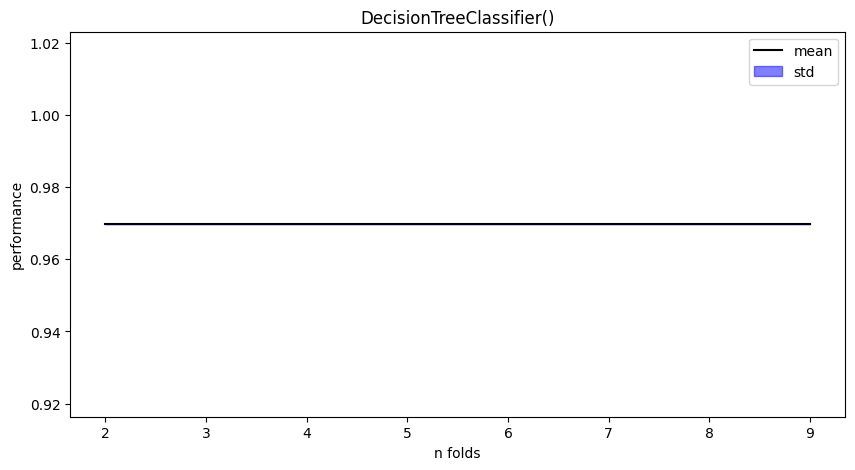

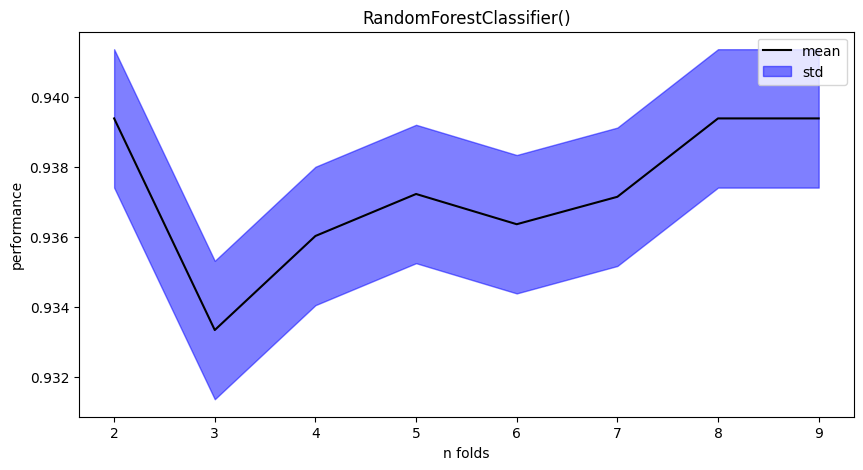

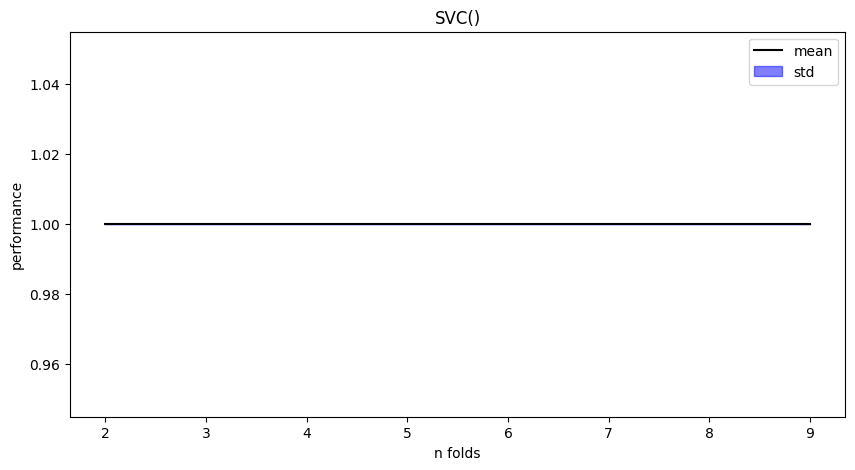

In [58]:
X = Lol_Statistics.iloc[:,:-1]
y = Lol_1ras_5_columnas['Range type_fact']
# Al final se optó por usar la columna 'Range type' debido a la binariedad de esta y los accuracy tan buenos que ofrecia

# Usando train_test_split
# DecisionTreeClassifier
accuracy_DecisionTreeClassifier = show_curve(DecisionTreeClassifier(), 'train_test_split', 1, 'entropy', 'poly', 3, 'poly')
print("Precisión en el conjunto de prueba usando DecisionTreeClassifier:", accuracy_DecisionTreeClassifier)

# RandomForestClassifier
accuracy_RandomForestClassifier = show_curve(RandomForestClassifier(), 'train_test_split', 2, 'entropy', 'poly', 3, 'poly')
print("Precisión en el conjunto de prueba usando RandomForestClassifier:", accuracy_RandomForestClassifier)

# SVC
accuracy_SVC = show_curve(SVC(), 'train_test_split', 3, 'entropy', 'poly', 1, 0.1)
print("Precisión en el conjunto de prueba usando SVC:", accuracy_SVC)


Precisión en el conjunto de prueba usando DecisionTreeClassifier:  0.9783929247277603
Precisión en el conjunto de prueba usando RandomForestClassifier:  0.9692161348574282
Precisión en el conjunto de prueba usando SVC:  0.9422297315319363


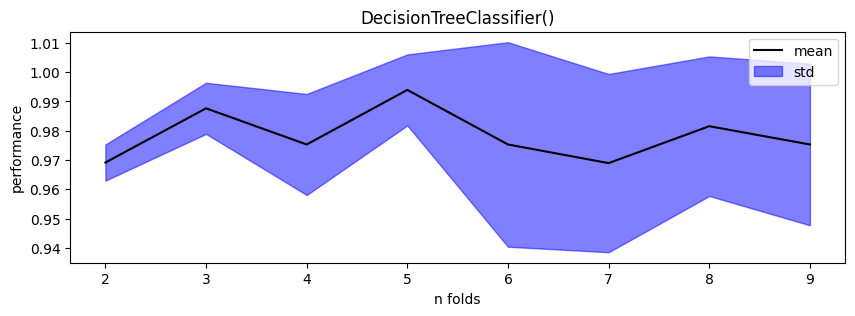

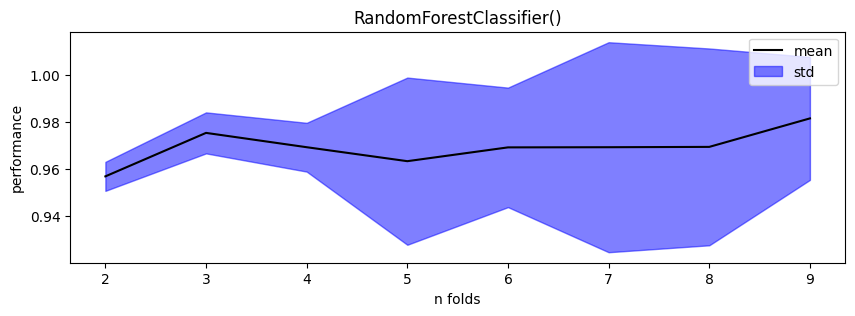

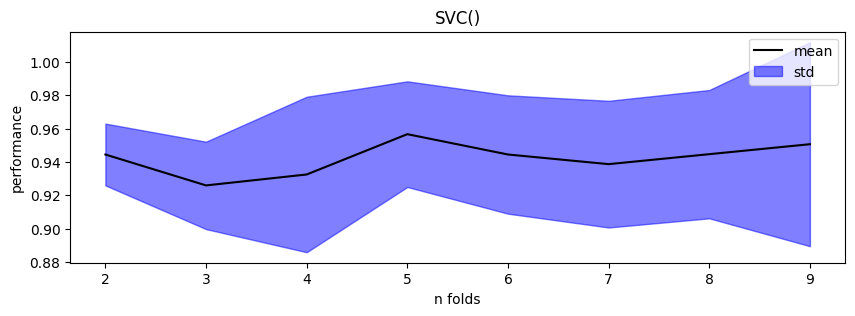

In [51]:
# Usando cross validation

# DecisionTreeClassifier
accuracy_DecisionTreeClassifier = show_curve(DecisionTreeClassifier(), 'cross_val_score', 1, 'entropy',  'poly', 3, 'poly')
print("Precisión en el conjunto de prueba usando DecisionTreeClassifier: ", accuracy_DecisionTreeClassifier)

# RandomForestClassifier
accuracy_RandomForestClassifier = show_curve(RandomForestClassifier(), 'cross_val_score',2, 'entropy',  'poly', 3, 'poly')
print("Precisión en el conjunto de prueba usando RandomForestClassifier: ", accuracy_RandomForestClassifier)

# SVC
accuracy_SVC = show_curve(SVC(), 'cross_val_score', 3, 'entropy',  'poly', 3, 'poly')
print("Precisión en el conjunto de prueba usando SVC: ", accuracy_SVC)



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3112 - loss: 1.1598
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3664 - loss: 1.1252
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3538 - loss: 1.1103
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3666 - loss: 1.0950
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4205 - loss: 1.0458
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4267 - loss: 1.0594
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4221 - loss: 1.0481
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4590 - loss: 1.0380
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4641 - loss: 1.0262
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4506 - loss: 1.0343
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2955 - loss: 1.1574  
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5103 - loss: 1.0022 -

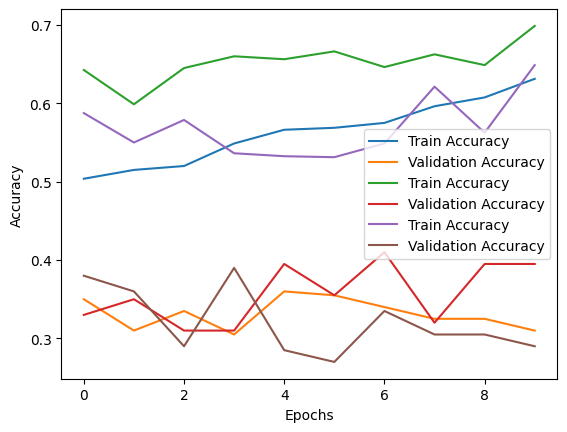

In [76]:
def modelo_n_neuronas(n):

  if (n == 3) :

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=X_train[0].shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

  elif (n == 6):

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=X_train[0].shape),
        tf.keras.layers.Dense(1500, activation=tf.nn.relu),
        tf.keras.layers.Dense(500, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

  elif (n == 10):

    model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=X_train[0].shape),
      tf.keras.layers.Dense(16380, activation=tf.nn.relu),
      tf.keras.layers.Dense(8190, activation=tf.nn.relu),
      tf.keras.layers.Dense(4090, activation=tf.nn.relu),
      tf.keras.layers.Dense(2050, activation=tf.nn.relu),
      tf.keras.layers.Dense(1500, activation=tf.nn.relu),
      tf.keras.layers.Dense(500, activation=tf.nn.relu),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

def modelo_fit (m):

  m.fit(X_train, y_train_ohe, epochs=10)

  test_loss, test_acc = m.evaluate(X_test, y_test_ohe)

  history = m.fit(X_train,
            y_train_ohe,
            epochs=10,
            batch_size=40,
            validation_data=(X_test, y_test_ohe))

  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=3)

modelo_3_neuronas = modelo_n_neuronas(3)
modelo_6_neuronas = modelo_n_neuronas(6)
modelo_10_neuronas = modelo_n_neuronas(10)

modelo_fit(modelo_3_neuronas)
modelo_fit(modelo_6_neuronas)
modelo_fit(modelo_10_neuronas)
